In [ ]:
# for the presentation it is better to use the full screen
# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))

## Scopus

https://www.elsevier.com/__data/assets/pdf_file/0007/69451/Scopus_ContentCoverage_Guide_WEB.pdf

### Scopus – an overview
>Scopus launched in November 2004. Scopus is a **source-neutral abstract and citation database** curated by independent subject matter experts. With over 25,100 titles from more than 5,000 international publishers, Scopus delivers the most comprehensive overview of the world’s research output in the fields of science, technology, medicine, social science, and arts and humanities.  

<img src='img/scopus_overview.pdf' width=600>

We might use the data-driven approach in Scopus to address our questions
- Where should I publish?
- How can I make sure my research is novel? Or check if it is a hot topic
- directions to go with my research?
- finding founding sources
- find collaborators or future positions
- What else? What are you using Scopus for? (own profile)

Let us take a [look](https://www.scopus.com/search/)!

###  Integrating Scopus APIs into your everyday workflow

Aside from the user interface, Scopus also has Application Programming Interfaces (APIs) that offer the same features, but then in a machine-readable format that enables software, rather than humans on the UI to find articles, authors and institutions in Scopus.  

This allows developers to write programs that automatically extract data from Scopus and add that data to their systems and applications.

<img src='img/scopus_api.png' width=500>

> This site, https://dev.elsevier.com, is for developers looking to get programmatic access to:
- journals and books published by Elsevier on ScienceDirect full-text platform;
- **citation data and abstracts** from virtually all relevant scholarly journals, as indexed by Scopus, Elsevier's citation database.
- **research metrics** available on SciVal, Elsevier’s platform for research performance benchmarking.
- engineering resources available on Engineering Village.
- curated abstracts, indices and other metadata indexed by Embase, Elsevier's biomedical abstract and indexing database.

> Anyone can obtain an API Key and use the **APIs free of charge**, provided that our policies for using APIs and the data are honored. Furthermore, full API access is only granted to clients that run within the networks of organizations that have subscriptions to the corresponding Elsevier product. Clients without subscriptions have access to limited basic metadata for most publications and citation records, as well as to basic search functionality. Content published by Elsevier under Open Access licenses is fully available.

<img src='img/api_overview.png' width=600>

How to get access to the APIs?

https://dev.elsevier.com

In [ ]:
import requests
# enter your API key here
my_api = 'YOUR OWN API KEY'

url = 'http://api.elsevier.com/content/search/index:SCOPUS?query=AUTHLASTNAME%28biele%29%20AND%20SUBJAREA%28PHYS%29&apikey=10a4697d190a6052e0f9db35251b5f55'

# 2. send request
Response = requests.get(url,my_api)
    # 3. parse response
responseDict = Response.json()
# responseDict


### Alternative: Pybliometrics by Max Planck Institute

>Pybliometrics is a python-based API wrapper for the Scopus RESTful API written for Python 3. The wrapper allows users to access the Scopus database via user-friendly interfaces and can be used without prior knowledge of RESTful APIs. The package provides classes to interact with different Scopus APIs to retrieve information as diverse as citation counts, author information or document abstracts. Files are cached to speed up subsequent analysis. The package addresses all users of Scopus data, such as researchers working in Science of Science or evaluators. It facilitates re-producibility of research projects and enhances data integrity for researchers using Scopus data.  

https://pybliometrics.readthedocs.io/en/stable/index.html

In [ ]:
! pip install pybliometrics

Do run the notebook locally on your own machine and not on Azure.  
**For accessing ScopusSearch you need to have a Scopus API key and access to the services.** If you are at the TU Dresden and using their WIFI you have automaically access to it. If you are **NOT** at the TUD but you have a ZIH login, please do connect to the University web via VPN (here you can find how to set it up: https://tu-dresden.de/zih/dienste/service-katalog/arbeitsumgebung/zugang_datennetz/vpn).

In [1]:
from pybliometrics.scopus import AuthorSearch
# GIANAURELIO CUNIBERTI
s = AuthorSearch('AUTHLAST(CUNIBERTI) and AUTHFIRST(GIANAURELIO)')

In [2]:
print(s)

Search 'AUTHLAST(CUNIBERTI) and AUTHFIRST(GIANAURELIO)' yielded 2 authors:
    Cuniberti, Gianaurelio
    Cuniberti, Gianaurelio


In [3]:
s.authors

[Author(eid='9-s2.0-56273831400', surname='Cuniberti', initials='G.', givenname='Gianaurelio', affiliation='Technische Universität Dresden', documents='408', affiliation_id='60018353', city='Dresden', country='Germany', areas='MATE (313); PHYS (229); ENGI (172)'),
 Author(eid='9-s2.0-57214665737', surname='Cuniberti', initials='G.', givenname='Gianaurelio', affiliation='Technische Universität Dresden', documents='1', affiliation_id='60018353', city='Dresden', country='Germany', areas='MEDI (1); ENGI (1); CHEM (1)')]

In [4]:
import pandas as pd
df = pd.DataFrame(s.authors)
df

,eid,surname,initials,givenname,affiliation,documents,affiliation_id,city,country,areas
0,9-s2.0-56273831400,Cuniberti,G.,Gianaurelio,Technische Universität Dresden,408,60018353,Dresden,Germany,MATE (313); PHYS (229); ENGI (172)
1,9-s2.0-57214665737,Cuniberti,G.,Gianaurelio,Technische Universität Dresden,1,60018353,Dresden,Germany,MEDI (1); ENGI (1); CHEM (1)


In [9]:
from pybliometrics.scopus import AuthorRetrieval
rob = AuthorRetrieval('9-s2.0-36118563500')
print (rob,'\n')
cuniberti = AuthorRetrieval('9-s2.0-56273831400')
print (cuniberti)

Biele R. from Institute for Materials Science and Max Bergmann Center of Biomaterials,
published 17 document(s) since 2010 in 16 distinct source(s),
which were cited by 227 author(s) in 332 document(s) 

Cuniberti G. from Center for Advancing Electronics Dresden,
published 408 document(s) since 1996 in 179 distinct source(s),
which were cited by 7,301 author(s) in 9,148 document(s)


In [10]:
coauthors = rob.get_coauthors()
co_rob = pd.DataFrame(coauthors)

coauthors = cuniberti.get_coauthors()
co_cuniberti = pd.DataFrame(coauthors)
co_cuniberti.head()

,surname,given_name,id,areas,affiliation_id,name,city,country
0,Müllen,Klaus,36047278500,Chemistry (all); Materials Science (all); Chem...,60030637,Max Planck Institute for Polymer Research,Mainz,Germany
1,Eckert,Juergen H.,55613237718,Materials Science (all); Engineering (all); Ph...,60028349,Montanuniversitat Leoben,Leoben,Austria
2,Büchner,Bernd B.,23020860700,Physics and Astronomy (all); Materials Science...,60007746,Leibniz-Institut für Festkörper- und Werkstoff...,Dresden,Germany
3,Schmidt,Oliver G.,7201468610,Physics and Astronomy (all); Materials Science...,60007746,Leibniz-Institut für Festkörper- und Werkstoff...,Dresden,Germany
4,Leo,Karl W.,7006009729,Physics and Astronomy (all); Materials Science...,60018353,Technische Universität Dresden,Dresden,Germany


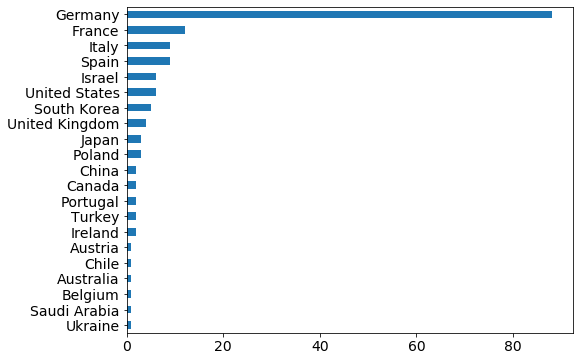

In [11]:
co_cuniberti['country'].value_counts().sort_values().plot(kind='barh',figsize = (8,6) , fontsize=14 );

In [12]:
cuniberti_eids = cuniberti.get_document_eids()

In [13]:
cuniberti_docs = pd.DataFrame(cuniberti.get_documents())

In [14]:
cuniberti_docs.dtypes

eid                    object
doi                    object
pii                    object
pubmed_id              object
title                  object
subtype                object
subtypeDescription     object
creator                object
afid                   object
affilname              object
affiliation_city       object
affiliation_country    object
author_count           object
author_names           object
author_ids             object
author_afids           object
coverDate              object
coverDisplayDate       object
publicationName        object
issn                   object
source_id              object
eIssn                  object
aggregationType        object
volume                 object
issueIdentifier        object
article_number         object
pageRange              object
description            object
authkeywords           object
citedby_count          object
openaccess             object
fund_acr               object
fund_no                object
fund_spons

In [15]:
cuniberti_docs['citedby_count'] = cuniberti_docs['citedby_count'].astype('float')

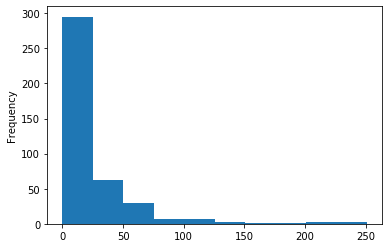

In [16]:
cuniberti_docs['citedby_count'].plot(kind='hist')

In [17]:
cuniberti.affiliation_current

[Affiliation(id='113814751', parent='60018353', type='dept', relationship='author', afdispname=None, preferred_name='Center for Advancing Electronics Dresden', parent_preferred_name='Technische Universität Dresden', country_code='deu', country='Germany', address_part='Nöthnitzer Strasse 43', city='Dresden', state='Sachsen', postal_code='1187', org_domain='tu-dresden.de', org_URL='https://tu-dresden.de/'),
 Affiliation(id='114005729', parent='60018353', type='dept', relationship='author', afdispname=None, preferred_name='Dresden Center for Computational Materials Science (DCMS)', parent_preferred_name='Technische Universität Dresden', country_code='deu', country='Germany', address_part='Nöthnitzer Strasse 43', city='Dresden', state='Sachsen', postal_code='1187', org_domain='tu-dresden.de', org_URL='https://tu-dresden.de/'),
 Affiliation(id='103940045', parent='60018353', type='dept', relationship='author', afdispname=None, preferred_name='Institute for Materials Science', parent_preferr

In [18]:
cuniberti.h_index

'51'

In [19]:
pd.DataFrame(cuniberti.journal_history)

,sourcetitle,abbreviation,type,issn
0,Acta Biomaterialia,Acta Biomater.,j,17427061
1,Energies,Energies,j,19961073
2,Journal of Materials Science,J Mater Sci,j,15734803
3,Journal of Physical Chemistry B,J Phys Chem B,j,15206106
4,Journal of the Electrochemical Society,J Electrochem Soc,j,19457111
...,...,...,...,...
174,Journal of Raman Spectroscopy,J. Raman Spectrosc.,j,03770486
175,Comptes Rendus Physique,C. R. Phys.,j,16310705
176,Organic Chemistry Frontiers,Org. Chem. Front.,j,20524129
177,FEMS Microbiology Letters,FEMS Microbiol. Lett.,j,03781097


In [20]:
cuniberti_docs

,eid,doi,pii,pubmed_id,title,subtype,subtypeDescription,creator,afid,affilname,...,issueIdentifier,article_number,pageRange,description,authkeywords,citedby_count,openaccess,fund_acr,fund_no,fund_sponsor
0,2-s2.0-85083111248,10.35848/1347-4065/ab7e11,None,None,Towards synthetic neural networks: Can artific...,ar,Article,Wlaźlak E.,60018353;60017351,Technische Universität Dresden;AGH University ...,...,SI,SI0801,None,© 2020 The Japan Society of Applied Physics. T...,None,2.0,0,None,undefined,None
1,2-s2.0-85082390650,10.1088/1361-6528/ab6d9b,None,None,Modification of titanium implants using biofun...,ar,Article,Krok E.,60031298;60018353;60008555,Fraunhofer Institute for Ceramic Technologies ...,...,20,205603,None,© 2020 IOP Publishing Ltd. The present study d...,Antibiotic | Antimicrobial surface | Biomateri...,0.0,0,ESF,100284305,European Social Fund
2,2-s2.0-85077811709,10.1021/acsaem.9b02243,None,None,Boron-Doped Single-Walled Carbon Nanotubes wit...,ar,Article,Liu Y.,60025616;60018353;60007746;116477279,Fraunhofer Institute for Material and Beam Tec...,...,3,None,2556-2564,Copyright © 2020 American Chemical Society. We...,ab initio stimulation | boron substitutional d...,1.0,0,CSC,604647,China Scholarship Council
3,2-s2.0-85082824921,10.3390/mi11030274,None,None,Surface modification of silicon nanowire based...,ar,Article,Klinghammer S.,60026306;60018353;60008583;60000086,University of Nebraska–Lincoln;Technische Univ...,...,3,274,None,© 2020 by the authors. We demonstrate the func...,Bio sensing | Dual-gate | Field effect transis...,0.0,1,DFG,EXC1056,Deutsche Forschungsgemeinschaft
4,2-s2.0-85082880360,10.1103/PhysRevApplied.13.034024,None,None,Mechanical Transmission of Rotational Motion b...,ar,Article,Lin H.H.,60032834;60024174;60018353,Max Planck Institute for the Physics of Comple...,...,3,034024,None,© 2020 American Physical Society. The manipula...,None,0.0,0,None,766864,International Max Planck Research School for A...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,2-s2.0-0007036419,10.1103/PhysRevB.57.1515,None,None,Ac conductance of a quantum wire with electron...,ar,Article,Cuniberti G.,60028229,Universität Hamburg,...,3,None,1515-1526,The complex ac response of a quasi-one-dimensi...,None,65.0,0,None,undefined,None
404,2-s2.0-0031579340,10.1209/epl/i1997-00166-9,None,None,Sum rule for transport in a Luttinger liquid w...,ar,Article,Cuniberti G.,60107402;60028229;60025153,Ospedale Policlinico San Martino;Universität H...,...,6,None,421-426,We show that the non-linear dc transport in a ...,None,3.0,0,None,undefined,None
405,2-s2.0-0031099224,10.1016/S0038-1098(97)80018-X,S003810989780018X,None,Coulomb blockade at a tunnel junction between ...,ar,Article,Sassetti M.,60107402;60028229;60025153,Ospedale Policlinico San Martino;Universität H...,...,12,None,915-919,The non-linear current - voltage characteristi...,Coulomb blockade | D. electron - electron inte...,5.0,0,None,undefined,None
406,2-s2.0-0010857955,10.1088/0953-8984/8/2/002,None,None,Transport and elementary excitations of a Lutt...,ar,Article,Cuniberti G.,60107402;60028229;60025153,Ospedale Policlinico San Martino;Universität H...,...,2,None,None,The low-temperature AC conductance of a one-di...,None,31.0,0,None,undefined,None


In [21]:
from pybliometrics.scopus import AbstractRetrieval
article = AbstractRetrieval('2-s2.0-85082880360')
print (article)

[[https://www.scopus.com/inward/record.uri?partnerID=HzOxMe3b&scp=85082880360&origin=inward][2-s2.0-85082880360]]  H. H. Lin, A. Croy, R. Gutierrez, C. Joachim and G. Cuniberti, Mechanical Transmission of Rotational Motion between Molecular-Scale Gears, Physical Review Applied, 13(3), (no pages found)(2020). https://doi.org/{self.doi}, https://www.scopus.com/inward/record.uri?partnerID=HzOxMe3b&scp=85082880360&origin=inward, cited 0 times (Scopus).
  Affiliations:
   Technische Universität Dresden
   Max Planck Institute for the Physics of Complex Systems
   CEMES Centre d'Elaboration de Matériaux et d'Etudes Structurales


In [22]:
article.get_bibtex()

'@article{Lin2020MechanicalGears,\n  author = {H. H. Lin and A. Croy and R. Gutierrez and C. Joachim and G. Cuniberti},\n  title = {{Mechanical Transmission of Rotational Motion between Molecular-Scale Gears}},\n  journal = {Physical Review Applied},\n  year = {2020},\n  volume = {13},\n  number = {3},\n  pages = {-},\n  doi = {10.1103/PhysRevApplied.13.034024}}'

In [23]:
print (article.description)

© 2020 American Physical Society.The manipulation and coupling of molecule gears is the first step toward realizing molecular-scale mechanical machines. Here, we theoretically investigate the behavior of such gears using molecular-dynamics simulations. Within a nearly rigid-body approximation, we reduce the dynamics of the gears to the rotational motion around the orientation vector. This allows us to study their behavior based on a few collective variables. Specifically, for a single hexa(4-tert-butylphenyl)benzene molecule, we show that the rotational-angle dynamics correspond to those of a Brownian rotor. For two such coupled gears, we extract the effective interaction potential and find that it is strongly dependent on the center-of-mass distance. Finally, we study the collective motion of a train of gears. We demonstrate the existence of three different regimes, depending on the magnitude of the driving torque of the first gear: Underdriving, driving, and overdriving, which corres

In [24]:
article.publisher

'American Physical Societyrevtex@aps.org'

In [25]:
article.authors

[Author(auid='57216224322', indexed_name='Lin H.-H.', surname='Lin', given_name='H. H.', affiliation=['60018353', '60032834']),
 Author(auid='12446448300', indexed_name='Croy A.', surname='Croy', given_name='A.', affiliation=['60018353']),
 Author(auid='56362424800', indexed_name='Gutierrez R.', surname='Gutierrez', given_name='R.', affiliation=['60018353']),
 Author(auid='26643165300', indexed_name='Joachim C.', surname='Joachim', given_name='C.', affiliation=['60024174']),
 Author(auid='56273831400', indexed_name='Cuniberti G.', surname='Cuniberti', given_name='G.', affiliation=['60018353', '60018353', '60018353'])]

... For more check https://pybliometrics.readthedocs.io/en/stable/index.html